In [1]:
import pandas as pd
import numpy as np
import random
from pre_no_ip_normalize import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (16,9)
from sklearn import metrics

# In[2]:


#normal_data
normal_df = pd.read_csv('../data/normal1.csv')
processed_normal = process_df(normal_df)

# # attack_data
attack_df = pd.read_csv('../data/attack1.csv')
processed_attack = process_df(attack_df)

In [2]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=30, n_iter=5)
svd_normal = svd.fit_transform(processed_normal.values)
svd_attack = svd.fit_transform(processed_attack.values)

from sklearn.model_selection import train_test_split

x_normal_train, x_normal_test = train_test_split(
    svd_normal, test_size=0.2, random_state=42)

In [3]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation

# model = Sequential()
# model.add(Dense(20, input_dim=svd_normal.shape[1], activation='relu'))
# model.add(Dense(3, activation='relu')) # size to compress to
# model.add(Dense(20, activation='relu'))
# model.add(Dense(svd_normal.shape[1])) # Multiple output neurons
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(x_normal_train,x_normal_train,verbose=1,epochs=20)
# model.save("svd_normalized_no_ip_5")

import keras
model = keras.models.load_model('svd_normalized_no_ip_5')

Metal device set to: Apple M1 Pro


2022-04-12 14:13:45.636326: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-12 14:13:45.636433: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2022-03-27 18:39:19.448501: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-27 18:39:19.479007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.12154504808120192
0.12167092074854853


<AxesSubplot:>

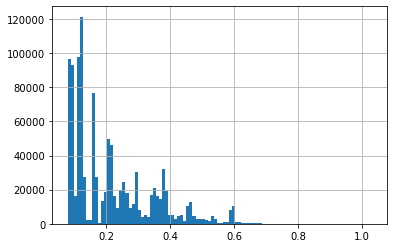

In [4]:
# from sklearn import metrics
# pred_normal_train = model.predict(x_normal_train)
# print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))


# # In[10]:


# pred_normal_test = model.predict(x_normal_test)
# print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))


# # In[12]:


# pred_attack = model.predict(svd_attack)

# score_list = []
# for index, x in enumerate(pred_attack):
#     score_list.append(np.sqrt(metrics.mean_squared_error(pred_attack[index],svd_attack[index])))

# attack_df['score'] = score_list


# # In[13]:


# attack_df['score'].hist(bins = 100)

In [4]:
pred_normal = model.predict(svd_normal)

normal_score_list = []
#RMSE
for index, x in enumerate(pred_normal):
    normal_score_list.append(np.sqrt(metrics.mean_squared_error(pred_normal[index],svd_normal[index])))

normal_df['score'] = normal_score_list

2022-04-12 14:17:46.795591: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-12 14:17:46.825812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


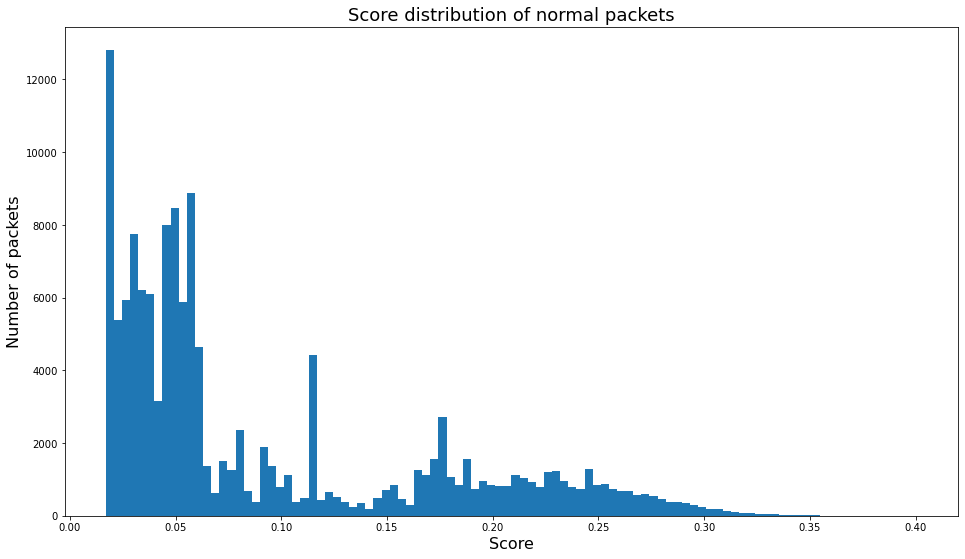

In [5]:
plt.hist(normal_score_list,bins = 100)
plt.xlabel("Score", fontsize = 16)
plt.ylabel("Number of packets",fontsize = 16)
plt.title("Score distribution of normal packets",fontsize = 18)
plt.savefig("score_distribution_normal_model2.png", dpi = 300, bbox_inches = "tight")

In [6]:
normal_df['score'].describe().apply(lambda x: format(x, 'f'))

count    140538.000000
mean          0.092607
std           0.078761
min           0.016926
25%           0.034103
50%           0.055653
75%           0.149622
max           0.400772
Name: score, dtype: object

In [7]:
normal_df['score'].quantile(0.995)

0.3071170196565171

In [8]:
pred_attack = model.predict(svd_attack)

score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(svd_attack[index],pred_attack[index])))

attack_df['score'] = score_list

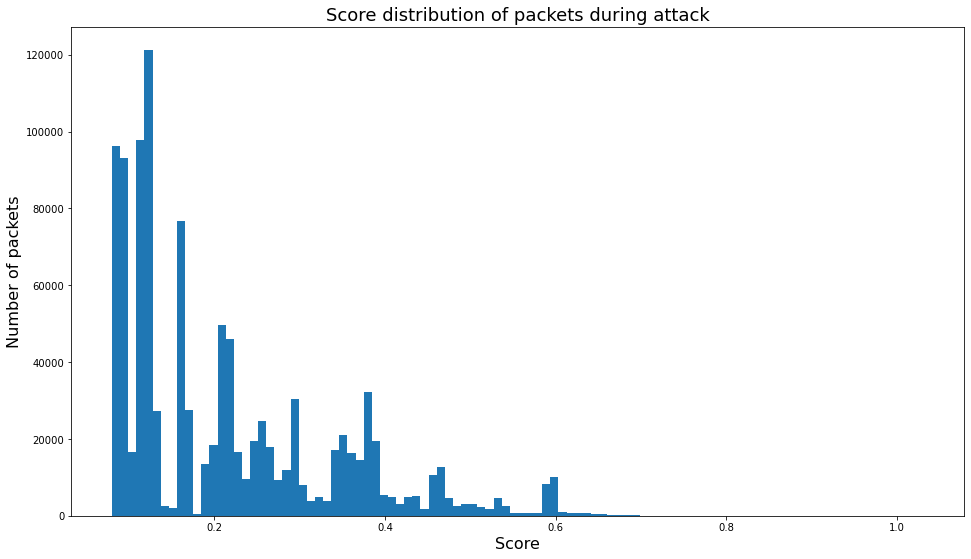

In [9]:
plt.hist(score_list,bins = 100)
plt.xlabel("Score", fontsize = 16)
plt.ylabel("Number of packets",fontsize = 16)
plt.title("Score distribution of packets during attack",fontsize = 18)
plt.savefig("score_distribution_attack_model2.png", dpi = 300, bbox_inches = "tight")

In [10]:
attack_df['score'].describe().apply(lambda x: format(x, 'f'))

count    1070554.000000
mean           0.215454
std            0.128629
min            0.080043
25%            0.117081
50%            0.166269
75%            0.290680
max            1.031568
Name: score, dtype: object

In [11]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']

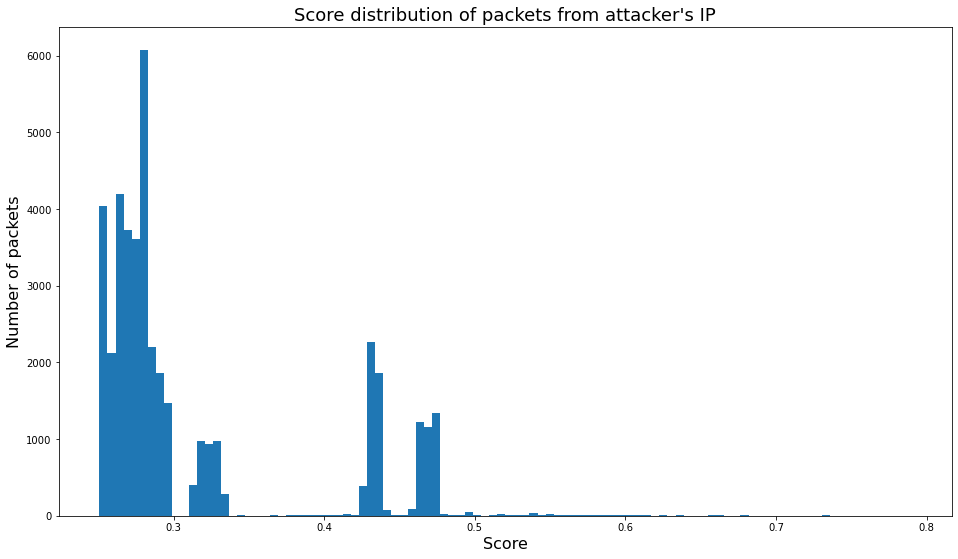

In [12]:
plt.hist(nmap_df['score'].to_list(),bins = 100)
plt.xlabel("Score", fontsize = 16)
plt.ylabel("Number of packets",fontsize = 16)
plt.title("Score distribution of packets from attacker's IP",fontsize = 18)
plt.savefig("score_distribution_ip_model1.png", dpi = 300, bbox_inches = "tight")

In [13]:
nmap_df['score'].describe().apply(lambda x: format(x, 'f'))

count    41824.000000
mean         0.315370
std          0.075448
min          0.250676
25%          0.267251
50%          0.280425
75%          0.324630
max          0.789536
Name: score, dtype: object

In [20]:
attack_df['score'].quantile(0.77)

0.2969996505818964

0.2506760759512774

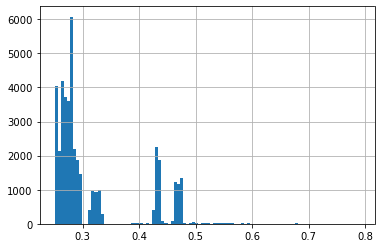

In [5]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']


# In[15]:


nmap_df['score'].hist(bins = 100)


# In[20]:


nmap_df['score'].min()

<AxesSubplot:>

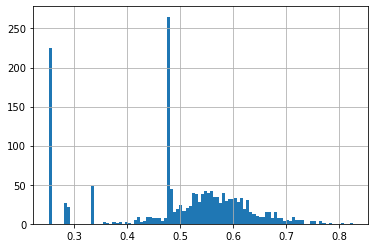

In [6]:

# In[21]:


normal_wordpress = attack_df[attack_df["ip.dst"] == '89.100.107.147']


# In[23]:


normal_wordpress['score'].hist(bins=100)

Text(0, 0.5, 'Number of packets')

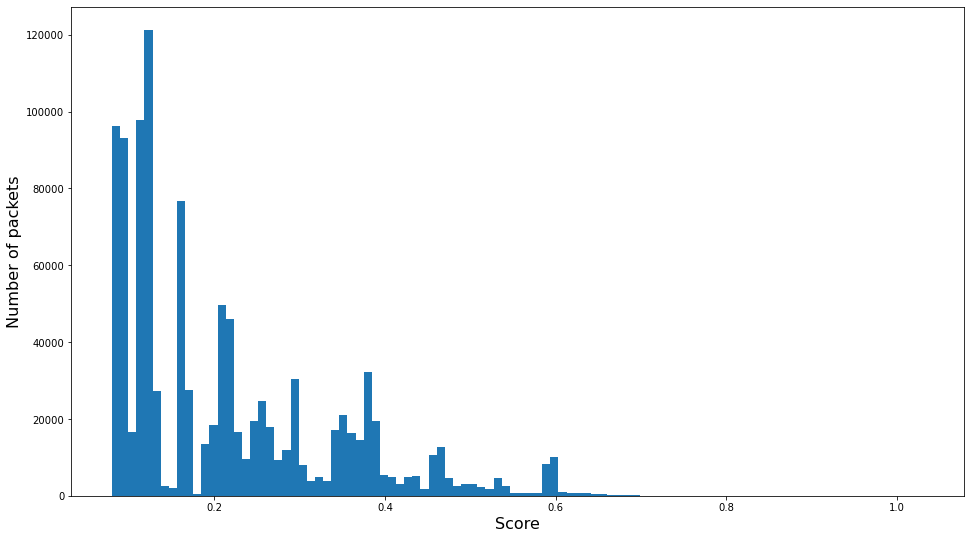

In [7]:
plt.figure(figsize=(16,9))
plt.hist(score_list,bins = 100)
plt.xlabel("Score", fontsize = 16)
plt.ylabel("Number of packets",fontsize = 16)

Text(0, 0.5, 'Number of packets')

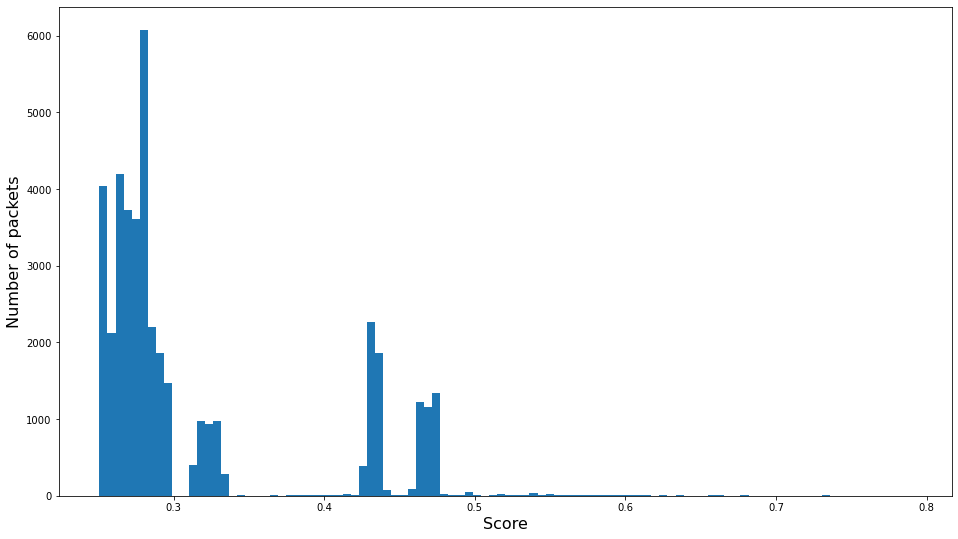

In [8]:
plt.figure(figsize=(16,9))
plt.hist(list(nmap_df['score']),bins = 100)
plt.xlabel("Score", fontsize = 16)
plt.ylabel("Number of packets",fontsize = 16)